In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

In [7]:
from sklearn.datasets.samples_generator import make_blobs

In [8]:
X, Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)

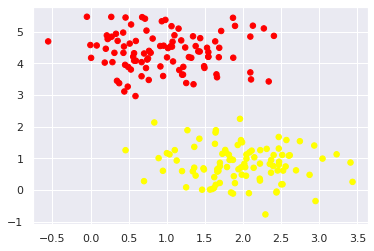

In [9]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 30, cmap="autumn")

(-1.0, 3.5)

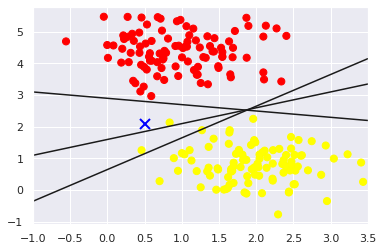

In [10]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="autumn")
plt.plot([0.5], [2.1], 'x', color="blue", markeredgewidth=2, markersize=10)

for a, b in [(1,0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yy = a * xx + b
    plt.plot(xx, yy, "-k")
    
plt.xlim(-1,3.5)



In [1]:
from sklearn.svm import SVC

In [11]:
model=SVC(kernel="linear", C = 1E10)
model.fit(X,Y)


SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [24]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
    print(model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=200, linewidth=1, facecolors = "cyan");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

[[0.59009904 2.96974544]
 [2.33812285 3.43116792]
 [0.83685684 2.13635938]]


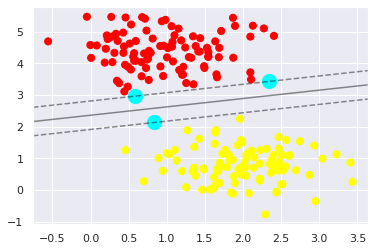

In [30]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
plt_svc(model, plot_support=True)
